In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import nan

In [4]:
turkey = pd.read_csv('data/clean_data/population-turkey.csv', thousands=",")

#source = http://www.worldometers.info/world-population/turkey-population/

In [5]:
refugees_turkey = pd.read_csv('data/clean_data/syr-reg_ref_by_date-turkey.csv')

#source = https://data2.unhcr.org/en/situations/syria/location/113

refugees_turkey['first of year'][1] = refugees_turkey['individuals'][1]

C:\Users\corbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
refugees_turkey = refugees_turkey.dropna()

In [7]:
turkey = turkey.dropna()


In [8]:
refugees_turkey =refugees_turkey.reset_index()

In [9]:
refugees_turkey['Date'] = 0

In [10]:
for i in range(len(refugees_turkey)):

    refugees_turkey['Date'][i] = float(refugees_turkey['data_date'][i][-4:])

C:\Users\corbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
refugees_turkey = refugees_turkey.rename(columns={'Date': 'Year'})

In [12]:
turkey = turkey.reset_index()

In [13]:
type(turkey['Year'][0])

numpy.float64

In [14]:
turkey = turkey.merge(refugees_turkey, on='Year')

In [15]:
turkey

,index_x,Year,Population,Yearly %,Yearly,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban,Urban Population,Country's Share of,World Population,Turkey,index_y,data_date,individuals,first of year
0,2,2018.0,81916871.0,1.45%,"1,171,851",305000.0,30.2,2.10,106.0,72.10%,59060906.0,1.07%,7.632819e+09,19,435,1/25/2018,3466263,3466263.0
1,3,2017.0,80745020.0,1.55%,"1,232,594",305000.0,30.2,2.10,105.0,72.00%,58172652.0,1.07%,7.550262e+09,19,409,1/12/2017,2854968,2854968.0
2,4,2016.0,79512426.0,1.59%,"1,240,954",305000.0,30.2,2.10,103.0,72.00%,57251665.0,1.06%,7.466964e+09,18,390,2/15/2016,2620553,2620553.0
3,5,2015.0,78271472.0,1.59%,"1,188,912",325434.0,29.9,2.12,102.0,71.90%,56288353.0,1.06%,7.383009e+09,18,373,3/6/2015,1698472,1698472.0


Text(0, 0.5, 'Refugees as a percent of total Population')

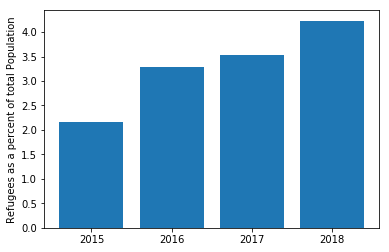

In [16]:
#plt.bar(turkey['Year'], turkey['Population']/1000000)


plt.bar(round(turkey['Year']), (turkey['individuals']/100)/(turkey['Population']/10000))
plt.xticks([2015, 2016, 2017, 2018])

plt.ylabel('Refugees as a percent of total Population')

#This is probably the best chart to show a crisis. The bottom chart is a bit underwhelming.

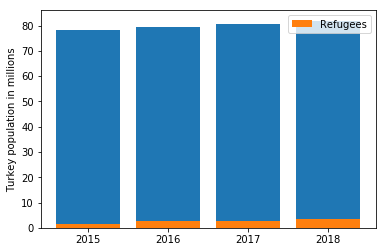

In [17]:
plt.bar(turkey['Year'], turkey['Population']/1000000)
plt.xticks([2015, 2016, 2017, 2018])
plt.bar(turkey['Year'], turkey['individuals']/1000000, label="Refugees")
plt.ylabel('Turkey population in millions')
plt.legend()